## Thermonuclear reaction between two Maxwellian population

In [ ]:
from a5py import Ascot
import numpy as np
import matplotlib.pyplot as plt

markerfile_name = "serpent_input"
a5 = Ascot("../ascot.h5")

# Define the grid in (r, phi, z)
r = np.linspace(4.2, 8.2, 51)
z = np.linspace(-2.0, 2.0, 51)
phi = np.linspace(0.0, 360.0, 2)

n_markers = 1000000

# Markerfile name optional, when beam distribution not provided both reactants are Maxwellian. The markers are stored in the 
markers_thermonuclear = a5.afsi.generate_markers_rejection(n_markers, "DT_He4n", r, phi, z, marker_file=markerfile_name)

/home/giacomo/ascot5/a5py/routines/afsi5.py:53: AscotUnitWarning: Argument(s) r, phi, z given without dimensions (assumed m, degree, m)
  ti1 = self._ascot.input_eval(rc, phic, zc, 0.0*unyt.s, 'ti1', grid=True)
/home/giacomo/ascot5/a5py/routines/afsi5.py:55: AscotUnitWarning: Argument(s) r, phi, z given without dimensions (assumed m, degree, m)
  ti2 = self._ascot.input_eval(rc, phic, zc, 0.0*unyt.s, 'ti2', grid=True)
/home/giacomo/ascot5/a5py/routines/afsi5.py:58: AscotUnitWarning: Argument(s) r, phi, z given without dimensions (assumed m, degree, m)
  thermal_dens1 = self._ascot.input_eval(rc, phic, zc, 0.0*unyt.s, 'ni1', grid=True)
/home/giacomo/ascot5/a5py/routines/afsi5.py:60: AscotUnitWarning: Argument(s) r, phi, z given without dimensions (assumed m, degree, m)
  thermal_dens2 = self._ascot.input_eval(rc, phic, zc, 0.0*unyt.s, 'ni2', grid=True)


Started generating 1000000 markers
Neutron source successfully generated in 0.19 minutes
The markers are stored in the binary file


## Direction vectors Plot

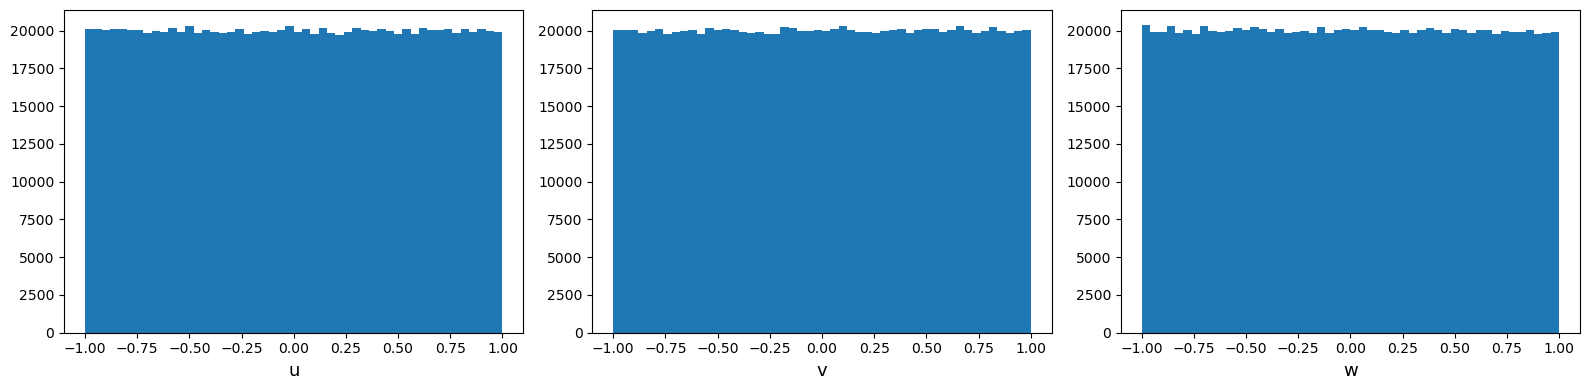

In [2]:
bins = 50
# Unpack markers
x = markers_thermonuclear[:, 0]
y  = markers_thermonuclear[:, 1]
z = markers_thermonuclear[:, 2]
u = markers_thermonuclear[:, 3]
v = markers_thermonuclear[:, 4]
w = markers_thermonuclear[:, 5]
ekin = markers_thermonuclear[:, 6]
fig = plt.figure(figsize=(16, 4)) 

ax1 = fig.add_subplot(1, 3, 1)
ax1.hist(u, bins=bins)
ax1.set_xlabel("u",fontsize = 13)

ax2 = fig.add_subplot(1, 3, 2, sharey=ax1)
ax2.hist(v, bins=bins)
ax2.set_xlabel("v",fontsize = 13)

ax3 = fig.add_subplot(1, 3, 3, sharey=ax1)
ax3.hist(w, bins=bins)
ax3.set_xlabel("w", fontsize = 13)

plt.tight_layout()
plt.show()

## Geometry plot

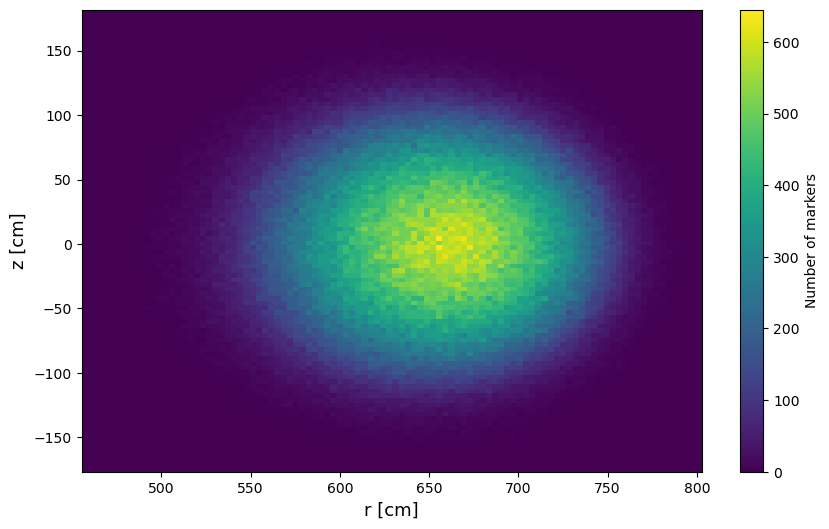

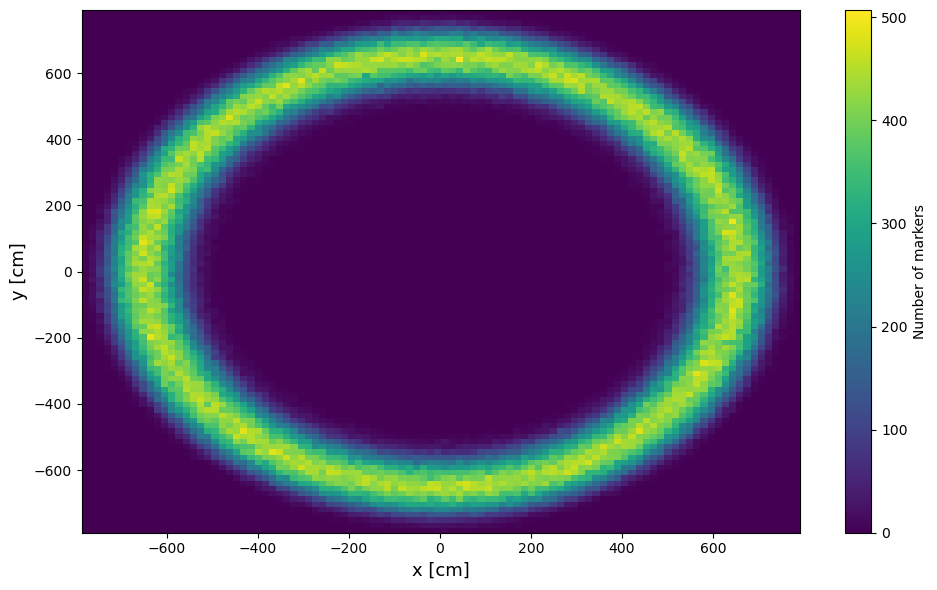

In [3]:
r = np.sqrt(x**2 + y**2)  
phi = np.arctan2(y, x) * 180 / np.pi  

fig = plt.figure(figsize=(10, 6))
hist1, _, _ = np.histogram2d(r, z, bins=100)

im1 = plt.imshow(hist1.T, origin="lower", extent=[r.min(), r.max(), z.min(), z.max()], cmap="viridis", aspect="auto")
plt.xlabel("r [cm]",  fontsize = 13)
plt.ylabel("z [cm]",  fontsize = 13)
plt.colorbar(im1, label="Number of markers")
plt.show()

fig = plt.figure(figsize=(10, 6))
hist2, _, _ = np.histogram2d(x, y, bins=100)

im2 = plt.imshow(hist2.T, origin="lower", extent=[x.min(), x.max(), y.min(), y.max()], cmap="viridis", aspect="auto")
plt.xlabel("x [cm]",  fontsize = 13)
plt.ylabel("y [cm]",  fontsize = 13)
plt.colorbar(im2, label="Number of markers")
plt.tight_layout()
plt.show()

## Energy plot

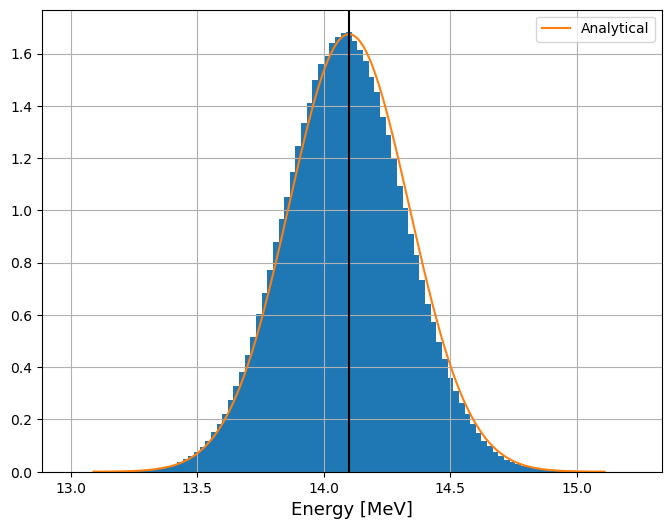

In [ ]:
from scipy.integrate import trapezoid

# Analytical energy distribution for comparison
T_keV = 10          # Ion temperature in keV
E_mean = 14.1       # Mean neutron energy in MeV (for DT fusion)
m_n = 1.675e-27     # neutron mass in kg
m_a = 6.645e-27     # alpha particle mass in kg
mass_factor = m_n / (m_n + m_a)   
sigma2 = 4 * mass_factor * T_keV * 1e-3 * E_mean  
sigma = np.sqrt(sigma2)   
E_n = np.linspace(E_mean - 3*sigma, E_mean + 3*sigma, 500)
f_E = np.exp(- ((E_n - E_mean)**2) / sigma2)
f_E /= trapezoid(f_E, E_n)

fig = plt.figure(figsize=(8, 6)) 

plt.hist(ekin, bins=100, density=True)
plt.plot(E_n, f_E, label="Analytical")
plt.xlabel("Energy [MeV]",fontsize = 13)
plt.axvline(x=14.1, c="black")
plt.legend()
plt.grid()
plt.show()

## Beam-Thermal reaction between a beam ions population and a Maxwellian population

In [ ]:
from a5py import Ascot
import numpy as np
import unyt

markerfile_name = "serpent_input_beam"
a5 = Ascot("../ascot.h5")

beamdist = a5.data.BEAMSD.getdist("5d")

# In Beam-Thermal mode it can be provided either the grid or in (r, phi, z) the edges of the simulation domain
r = beamdist.abscissa_edges("r")
phi = np.array([-60.0, 60.0])*unyt.degree
z = beamdist.abscissa_edges("z")

n_markers = 1000000

# Markerfile name optional, when beam distribution not provided both reactants are Maxwellian
markers = a5.afsi.generate_markers_rejection(n_markers, "DT_He4n", r, phi, z, marker_file=markerfile_name, beam=beamdist)

Started generating 1000000 markers
Neutron source successfully generated in 5.87 minutes
The markers are stored in the binary file


## Direction vectors Plot

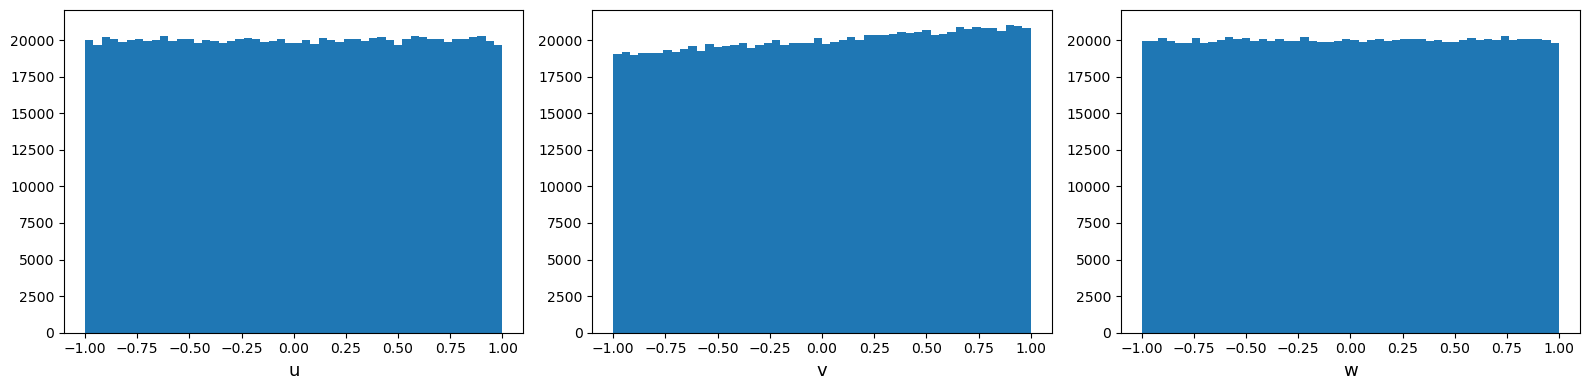

In [6]:
bins = 50
# Unpack markers
x = markers[:, 0]
y  = markers[:, 1]
z = markers[:, 2]
u = markers[:, 3]
v = markers[:, 4]
w = markers[:, 5]
ekin = markers[:, 6]
fig = plt.figure(figsize=(16, 4)) 

ax1 = fig.add_subplot(1, 3, 1)
ax1.hist(u, bins=bins)
ax1.set_xlabel("u",fontsize = 13)

ax2 = fig.add_subplot(1, 3, 2, sharey=ax1)
ax2.hist(v, bins=bins)
ax2.set_xlabel("v",fontsize = 13)

ax3 = fig.add_subplot(1, 3, 3, sharey=ax1)
ax3.hist(w, bins=bins)
ax3.set_xlabel("w", fontsize = 13)

plt.tight_layout()
plt.show()

## Geometry Plot

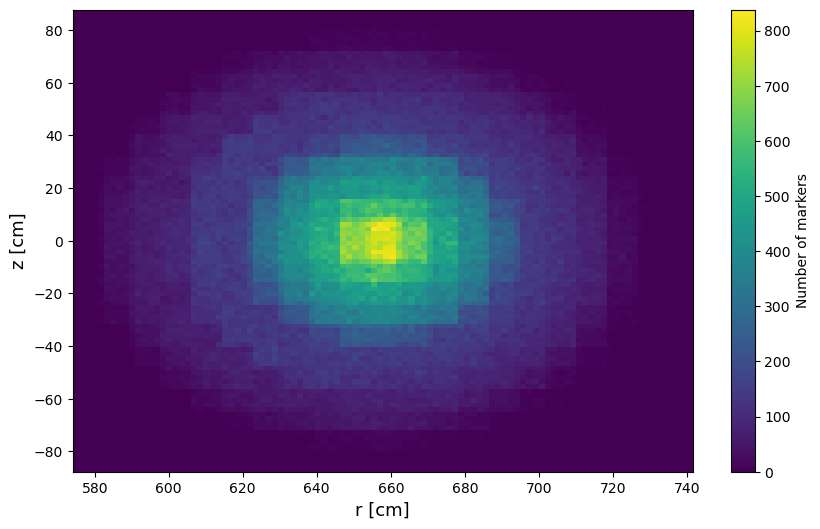

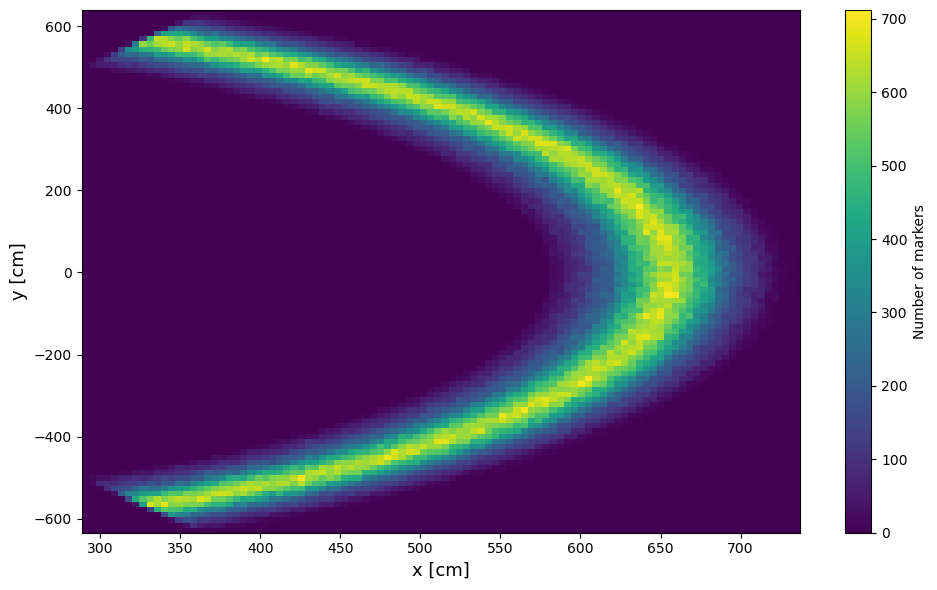

In [10]:
r = np.sqrt(x**2 + y**2)  
phi = np.arctan2(y, x) * 180 / np.pi  

fig = plt.figure(figsize=(10, 6))
hist1, _, _ = np.histogram2d(r, z, bins=100)

im1 = plt.imshow(hist1.T, origin="lower", extent=[r.min(), r.max(), z.min(), z.max()], cmap="viridis", aspect="auto")
plt.xlabel("r [cm]",  fontsize = 13)
plt.ylabel("z [cm]",  fontsize = 13)
plt.colorbar(im1, label="Number of markers")
plt.show()

fig = plt.figure(figsize=(10, 6))
hist2, _, _ = np.histogram2d(x, y, bins=100)

im2 = plt.imshow(hist2.T, origin="lower", extent=[x.min(), x.max(), y.min(), y.max()], cmap="viridis", aspect="auto")
plt.xlabel("x [cm]",  fontsize = 13)
plt.ylabel("y [cm]",  fontsize = 13)
plt.colorbar(im2, label="Number of markers")
plt.tight_layout()
plt.show()

## Energy Plot

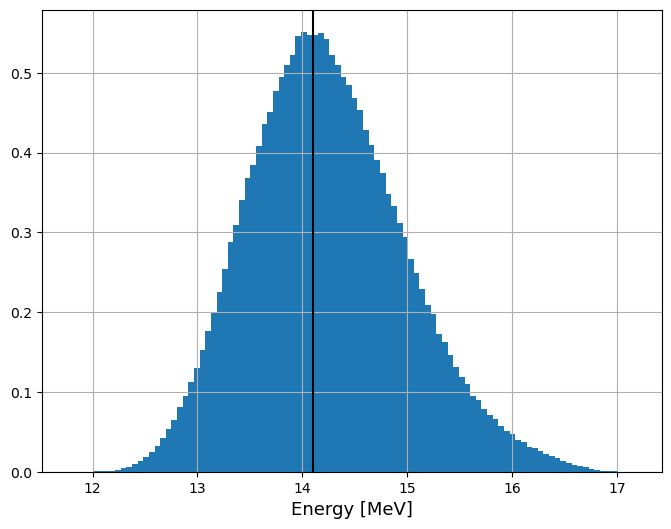

In [8]:
fig = plt.figure(figsize=(8, 6)) 

plt.hist(ekin, bins=100, density=True)
plt.xlabel("Energy [MeV]",fontsize = 13)
plt.axvline(x=14.1, c="black")
plt.grid()
plt.show()